# Word Counts in Language Data

So, we'll start by importing some things:

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# This allows us to use regex replace later
import re
import seaborn as sns

# Natural Language Toolkit
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.util import skipgrams


Now, let's pull in some text.  In the name of making you practice, **change the code below to read in the file located at the root of your datahub drive at `unix/literature/thebrotherskaramazov.txt`**

In [10]:
with open('unix/literature/thebrotherskaramazov.txt') as f:
    broskis = f.read()

First, we'll tokenize the data using `nltk.word_tokenize(yourdata)`. **Figure out why I used .lower() below, then look at the first ten items.**

In [11]:
token = nltk.word_tokenize(broskis.lower())
token[0:10]

['\ufeffthe',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'brothers',
 'karamazov',
 ',',
 'by']

This is gonna be lot of text.  **Figure out how many items are in the list.**

In [12]:
len(token)

439313

Oh no, that's a LOT of text.  **Save only the first 25000 words, then confirm by counting the number of items that that's what you've done.**

In [14]:
token = token[0:20000]

Now let's split it into a list of bigrams (that is, sets of 2 adjacent words).  **Make the split then look at the first ten items of the list. You'll get this by running `list(ngrams(data,N))`**. The list() element is because the `ngram` command natively creates a type of object called a `zip`)

In [15]:
ng = list(ngrams(token,2))
ng[1:10]

[('project', 'gutenberg'),
 ('gutenberg', 'ebook'),
 ('ebook', 'of'),
 ('of', 'the'),
 ('the', 'brothers'),
 ('brothers', 'karamazov'),
 ('karamazov', ','),
 (',', 'by'),
 ('by', 'fyodor')]

Now we'll count the number of times each ngram occurs.  **The `cleanitem` line exists for a specific reason, try and figure out why it occurs and what's it doing.**

In [16]:
counts = {}
for item in sorted(list(ng)):
    cleanitem = re.sub(",|\'|\(|\)","",str(item))
    counts.update({cleanitem:ng.count(item)})

Now you'll turn those counts into a Pandas Dataframe.  This is tricky for silly reasons, but **examine the code below to figure out how I'm doing it.**

In [17]:
cdf = pd.DataFrame.from_dict(counts, orient ='index')
cdf.reset_index(inplace=True)
cdf = cdf.rename(columns = {'index':'word', 0:'count'})


Now **sort the dataframe in descending order, and view the top 20 rows**

In [18]:
cdf = cdf.sort_values('count',ascending=False)
cdf.head(20)

,word,count
16,and,204
11626,’ s,133
7063,of the,108
429,. he,99
5311,in the,93
4580,he was,81
494,. the,79
4020,fyodor pavlovitch,62
10294,to the,58
9240,that he,57


As expected, many of the most frequent words are *function words*.  **How far down the list do you need to go to start finding content words, which tell us about actual patterns in the dataset (e.g. important characters or concepts)?  Do you see any names or words which tell you about the story?**

In [19]:
# Your answer here.

Now, create a barplot showing the counts of the 200 most frequent **single words**. You'll need to rerun the n-gram analysis. **Does this follow the expected (Zipfian) distributions?**

In [20]:
ng = list(ngrams(token,1))
counts = {}
for item in sorted(list(ng)):
    cleanitem = re.sub(",|\'|\(|\)","",str(item))
    counts.update({cleanitem:ng.count(item)})
cdf1 = pd.DataFrame.from_dict(counts, orient ='index')
cdf1.reset_index(inplace=True)
cdf1 = cdf1.rename(columns = {'index':'word', 0:'count'})
cdf1 = cdf1.sort_values('count',ascending=False)

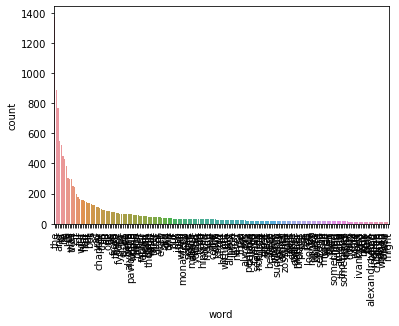

In [21]:
grcdf = cdf1.head(200)
g=sns.barplot(x='word',y='count',data=grcdf)
plt.xticks(rotation=90);

Now, **create a new column in your count dataframe with the log (using `np.log`) of `count`, and graph the log counts of the most frequent words.** This should, if this distribution is zipfian, cause the line to 'straighten out'. Does the shape change?

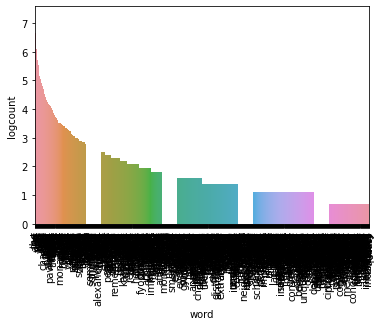

In [22]:
cdf1['logcount'] = np.log(cdf1['count'])
grcdf = cdf1.head(1000)
g=sns.barplot(x='word',y='logcount',data=grcdf)
plt.xticks(rotation=90);

Now, **write a for loop to do the get ngram counts for 1, 2, 3, 4, and 5 grams, and store the highest frequency gram (word/count pair) for each N.**  Do we see the highest frequency count fall off as we might expect?

In [23]:
# An exercise left to the reader

### Getting into the Weed with Data

Will is allergic to Cannabis, a situation which is not actually particularly uncommon (and although present from birth in Will's case, occasionally develops later in life among smokers and workers in the cannabis industry who are constantly exposed to the plants and pollen).  But as a result, Cannabis plants or smoke, alongside other allergic symptoms, make his larynx (voicebox) swell up, and potentially, shut. This is pretty unfortunate, and serves as a plea to ask your friends to refrain from smoking or growing around other people and focus on more considerate methods of cannabis use, but it also contextualizes why this analysis is interesting.

In 2013, when he was in the depths of dissertating, Will received a Christmas gift card from his girlfriend (now wife) to a relaxation spa called 'The Wellness Center'.  Although it was a very thoughtful gift, Will immediately thought it was a joke, because, not knowing the facility, it sounded entirely like a Marijuana dispensary.  It wound up with a laugh, but everybody present agreed that it sounded like a dispensary, particularly given that Cannabis had been initially legalized under medical pretext in Colorado.

An initial corpus search (documented [here](https://wstyler.ucsd.edu/posts/dispensary_names.html)) revealed that, indeed, this was a good assumption, with 'wellness' being the most common word in Dispensary names in 2013 by far.  Now, nearly 10 years later, and with recreational use now being legal without 'medical' pretext, let's see whether California cannabis retailer culture follows the same pattern, and whether 'wellness' is still a common term used in cannabis company names.

`texts/ca_mj.csv` is a file containing a list of all Cannabis License Holder business, downloaded via <https://search.cannabis.ca.gov/> .  **Load in the dataset for our use in Pandas, and look at the first few rows to get a sense of the data.**


In [24]:
mjdb = pd.read_csv('texts/ca_mj.csv')
mjdb.head()

,id,licenseNumber,licenseStatus,licenseTerm,licenseType,licenseDesignation,issueDate,expirationDate,licenseStatusDate,businessLegalName,...,premiseStreetAddress,premiseCity,premiseState,premiseCounty,premiseZipCode,businessEmail,businessPhone,parcelNumber,PremiseLatitude,PremiseLongitude
0,12130,C10-0000001-LIC,Surrendered,Annual,Commercial - Retailer,Adult-Use and Medicinal,11/02/2018 00:00:00,11/02/2020 00:00:00,NaN,"Psgc, Inc.",...,68415 Perez Rd,Cathedral City,CA,Riverside,92234,Jeff@atomicbudz.Com,(760) 322-4481,Data Not Available,33.784508,-116.468365
1,12131,C10-0000002-LIC,Active,Annual,Commercial - Retailer,Adult-Use and Medicinal,11/03/2018 00:00:00,11/03/2022 00:00:00,NaN,Monterey County Patients Group Incorporated,...,1988 Broadway St,Vallejo,CA,Solano,94589,Mcpgmembership@gmail.Com,(707) 653-2043,Data Not Available,38.140374,-122.252014
2,12132,C10-0000003-LIC,Active,Annual,Commercial - Retailer,Adult-Use and Medicinal,11/06/2018 00:00:00,11/06/2022 00:00:00,NaN,"Omega Group, Inc.",...,68031 Ramon Rd,Cathedral CTY,CA,Riverside,92234,Omegagroupcc@gmail.Com,(818) 281-7080,Data Not Available,33.815395,-116.474856
3,12133,C10-0000004-LIC,Active,Annual,Commercial - Retailer,Adult-Use,11/08/2018 00:00:00,11/08/2022 00:00:00,NaN,Leef Industries LLC,...,3700 Vista Chino E,Palm Springs,CA,Riverside,92262,Kortpotter@gmail.Com,(760) 832-9222,Data Not Available,33.845482,-116.505181
4,12134,C10-0000005-LIC,Active,Annual,Commercial - Retailer,Adult-Use and Medicinal,11/14/2018 00:00:00,11/14/2022 00:00:00,NaN,"Dpc Sf, LLC",...,2544 3rd St,San Francisco,CA,San Francisco,94122,Rw@dutchmansflat.Com,(415) 203-6277,Data Not Available,37.757382,-122.388353


There's lots of interesting data here, particularly for the GIS inclined.  **How many licenses have been issued, according to this list?**

In [25]:
mjdb.shape

(17029, 24)

Let's focus on the `businessDbaName` and `businessLegalName` variable.  There are a huge number of 'Data not available', LLC, Inc, and such, so we should drop those too.  But we don't want to drop all rows, as many businesses have the same 'DBA' (doing business as) name as their legal name.  So, we'll just remove those strings.  **Read the code below and explain to your neighbor what it does and why.**

In [26]:
mjdb['combined'] = mjdb['businessDbaName'].astype(str) + " " + mjdb['businessLegalName'].astype(str)
mjdbclean = mjdb.replace(regex=r'Data Not Available|LLC|Inc.|Inc|,|\.',value='')
dispnames = list(mjdbclean['combined'])

Let's sanity check the data and **make sure our `dispnames` list has the same number of rows as the original dataframe.**

In [27]:
len(dispnames)

17029

Now, we're going to create a single chunk of text out of all of the text. **Read the code below and explain to your neighbor what it does and why**

In [28]:
dn = ' '.join([str(i).lower() for i in dispnames])


Now, you've got a bunch of text.  **Use the code from above to tokenize, create bigrams, and get counts saved as `cdf`.**

In [29]:
token = nltk.word_tokenize(dn)
ng = list(ngrams(token,2))
counts = {}
for item in sorted(list(ng)):
    cleanitem = re.sub(",|\'|\(|\)","",str(item))
    counts.update({cleanitem:ng.count(item)})
cdf = pd.DataFrame.from_dict(counts, orient ='index')
cdf.reset_index(inplace=True)
cdf = cdf.rename(columns = {'index':'word', 0:'count'})
cdf = cdf.sort_values('count',ascending=False)

Now look at the top 60 items.  **Do you see a theme in modern California Cannabis business naming?  Is it wellness?**

In [30]:
cdf.head(60)

,word,count
26441,x farms,272
2044,bar x,271
3833,canyon produce,258
9576,farms bar,244
20111,"people ""s""",232
20607,produce canyon,231
22264,santa barbara,225
150,"""s"" farming",218
11390,gbh cultivation,211
6390,cultivation gbh,208


Now, find all rows which contain 'wellness' Hint: dataframe[dataframe['colname'].str.contains("string")].  **Does 'Wellness center' appear?**

In [31]:
cdf[cdf['word'].str.contains("wellness")].head(50)

,word,count
26054,wellness center,30
1538,and wellness,13
17656,medallion wellness,10
90,& wellness,9
26080,wellness group,7
17905,mercy wellness,7
20778,proper wellness,6
20326,place wellness,5
4457,ci wellness,5
26135,wellness the,5


Bigrams, when there are many variants, can sometimes disguise or downplay particular unigrams.  **Now run a unigram model, and see where 'wellness' ranks.**  (Note: dataframe.reset_index() allows you to re-index the data after sorting the data)

In [32]:
ng = list(ngrams(token,1))
counts = {}
for item in sorted(list(ng)):
    cleanitem = re.sub(",|\'|\(|\)","",str(item))
    counts.update({cleanitem:ng.count(item)})
cdf1 = pd.DataFrame.from_dict(counts, orient ='index')
cdf1.reset_index(inplace=True)
cdf1 = cdf1.rename(columns = {'index':'word', 0:'count'})
cdf1 = cdf1.sort_values('count',ascending=False)

In [33]:
cdf1=cdf1.reset_index()
cdf1.head(60)

,index,word,count
0,2363,farms,2697
1,2800,green,747
2,6,"""s""",613
3,2867,group,585
4,6514,valley,577
5,6241,the,515
6,2349,farm,513
7,2,&,471
8,3323,inc,458
9,2361,farming,420
